In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Importando dados

drive.mount('/content/drive')
data = pd.read_excel(r'/content/drive/MyDrive/Database p2d2_Pre_Processada.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 1.0, 'Gráfico de dispersão')

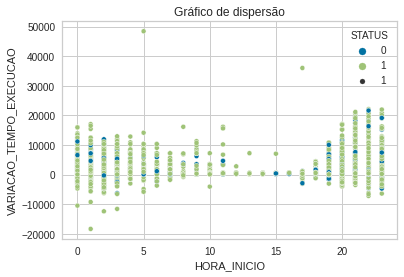

In [ ]:
sns.scatterplot(x="HORA_INICIO", y="VARIACAO_TEMPO_EXECUCAO",data=data, hue="STATUS", size=1).set_title("Gráfico de dispersão")

In [ ]:
# TODO: DEFINIR FEATURES E OUTPUT. Provavelmente será necessário rotular alguma feature (status, por exemplo).

X_data = data
X_data = X_data.drop(columns=[
                              'AMBIENTE',
                              'JOB',
                              'MINUTO_INICIO',
                              'MINUTO_FIM',
                              'ANO_DATA_EXECUCAO',
                              'MES_DATA_EXECUCAO',
                              'DIA_DATA_EXECUCAO',
                              # 'TEMPO_EXECUCAO',
                              'VARIACAO_TEMPO_EXECUCAO',
                              # 'HORA_INICIO',
                              # 'HORA_FIM',
                              'STATUS'
                              ])

Y_data = pd.DataFrame(data)
Y_data = Y_data.drop(columns=['HORA_INICIO', 'HORA_FIM', 'TEMPO_EXECUCAO', 
                              'VARIACAO_TEMPO_EXECUCAO', 'ANO_DATA_EXECUCAO', 
                              'MES_DATA_EXECUCAO', 'DIA_DATA_EXECUCAO', 
                              'MINUTO_INICIO', 'MINUTO_FIM'])

#values = pd.DataFrame(Normalizer().fit_transform(X_data))
values = pd.DataFrame(MinMaxScaler().fit_transform(X_data), columns=X_data.columns)
#values_y = pd.DataFrame(OneHotEncoder().fit_transform(Y_data).toarray())

X_data.head()
#Y_data.head()

,HORA_INICIO,HORA_FIM,TEMPO_EXECUCAO
0,0,0,589
1,0,3,10033
2,1,2,4871
3,1,1,60
4,1,1,0


In [ ]:
values

,HORA_INICIO,HORA_FIM,TEMPO_EXECUCAO
0,0.000000,0.000000,0.015162
1,0.000000,0.130435,0.258263
2,0.043478,0.086957,0.125386
3,0.043478,0.043478,0.001544
4,0.043478,0.043478,0.000000
...,...,...,...
14548,0.956522,0.956522,0.007156
14549,0.956522,0.956522,0.007182
14550,0.956522,0.956522,0.014518
14551,0.956522,0.956522,0.015187


In [ ]:
# K-Means
def kmeans_clustering(n_clusters, values):
  km = KMeans(n_clusters=n_clusters, n_init=10, max_iter=500, tol=0.0001, verbose=0)
  km.fit_predict(values)
  labels = km.labels_
  score_1 = silhouette_score(values, labels, metric='euclidean') # varia entre -1 e 1, quanto mais próximo de 1 melhor
  score_2 = davies_bouldin_score(values, labels) # quanto mais próximo de 0 melhor
  score_3 = calinski_harabasz_score(values, labels) # quanto maior o valor melhor é o clustering
  print(f"n_clusters = {n_clusters}, silhouette = {score_1}, davies bouldin = {score_2}, calinski harabasz = {score_3}")
  return labels
kmeans_clustering(2, values)
kmeans_clustering(3, values)
kmeans_clustering(4, values)
kmeans_clustering(5, values)
kmeans_clustering(6, values)
kmeans_clustering(7, values)
kmeans_clustering(8, values)
kmeans_clustering(9, values)
kmeans_clustering(10, values)
kmeans_clustering(15, values)

labels = kmeans_clustering(3, values)

n_clusters = 2, silhouette = 0.8358025795402159, davies bouldin = 0.40620161404098604, calinski harabasz = 59533.26356827875
n_clusters = 3, silhouette = 0.8625788632604399, davies bouldin = 0.2776084865587796, calinski harabasz = 88001.51683235719
n_clusters = 4, silhouette = 0.6243700079646076, davies bouldin = 0.4803749192341201, calinski harabasz = 78751.71158500959
n_clusters = 5, silhouette = 0.5849974511218604, davies bouldin = 0.670740972545898, calinski harabasz = 83881.09275878823
n_clusters = 6, silhouette = 0.595760109025684, davies bouldin = 0.5962320562689234, calinski harabasz = 91071.9637432615
n_clusters = 7, silhouette = 0.6064481660044224, davies bouldin = 0.5709561921966937, calinski harabasz = 94411.34546588271
n_clusters = 8, silhouette = 0.6145050845123495, davies bouldin = 0.5632489052371099, calinski harabasz = 100234.16136312974
n_clusters = 9, silhouette = 0.6291816761724378, davies bouldin = 0.5768570711469375, calinski harabasz = 102722.90750510135
n_cluste

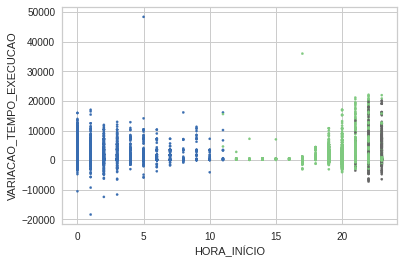

In [ ]:
plt.scatter(data['HORA_INICIO'], data['VARIACAO_TEMPO_EXECUCAO'], c=labels, s=5, cmap='Accent')
plt.xlabel('HORA_INÍCIO')
plt.ylabel('VARIACAO_TEMPO_EXECUCAO')
plt.show()

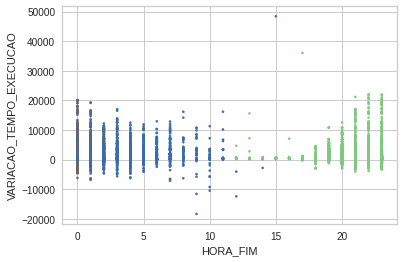

In [ ]:
plt.scatter(data['HORA_FIM'], data['VARIACAO_TEMPO_EXECUCAO'], c=labels, s=5, cmap='Accent')
plt.xlabel('HORA_FIM')
plt.ylabel('VARIACAO_TEMPO_EXECUCAO')
plt.show()

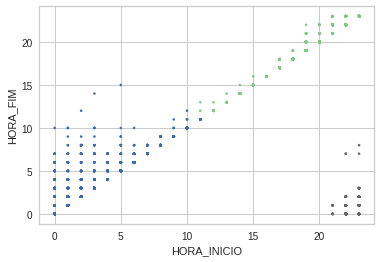

In [ ]:
plt.scatter(data['HORA_INICIO'], data['HORA_FIM'], c=labels, s=5, cmap='Accent')
plt.xlabel('HORA_INICIO')
plt.ylabel('HORA_FIM')
plt.show()

Text(0.5, 0, 'STATUS')

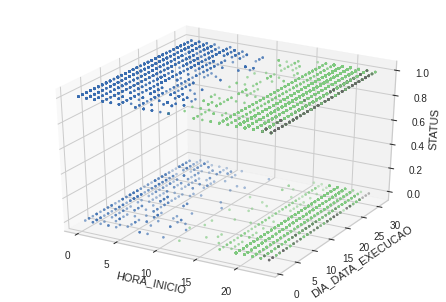

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(data['HORA_INICIO'], data['DIA_DATA_EXECUCAO'], data['STATUS'], c=labels, s=5, cmap='Accent')
ax.set_xlabel('HORA_INICIO')
ax.set_ylabel('DIA_DATA_EXECUCAO')
ax.set_zlabel('STATUS')

Text(0.5, 0, 'HORA_FIM')

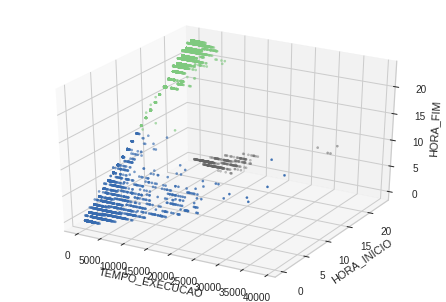

In [ ]:
fig = plt.figure()
bx = Axes3D(fig)
bx.scatter(data['TEMPO_EXECUCAO'], data['HORA_INICIO'], data['HORA_FIM'], c=labels, s=5, cmap='Accent')
bx.set_xlabel('TEMPO_EXECUCAO')
bx.set_ylabel('HORA_INICIO')
bx.set_zlabel('HORA_FIM')

Text(0.5, 0, 'HORA_FIM')

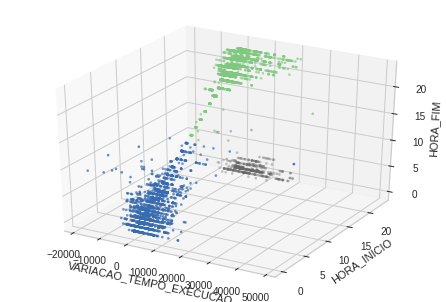

In [ ]:
fig = plt.figure()
cx = Axes3D(fig)
cx.scatter(data['VARIACAO_TEMPO_EXECUCAO'], data['HORA_INICIO'], data['HORA_FIM'], c=labels, s=5, cmap='Accent')
cx.set_xlabel('VARIACAO_TEMPO_EXECUCAO')
cx.set_ylabel('HORA_INICIO')
cx.set_zlabel('HORA_FIM')

Text(0.5, 0, 'HORA_FIM')

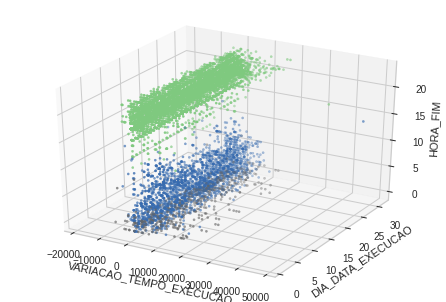

In [ ]:
fig = plt.figure()
dx = Axes3D(fig)
dx.scatter(data['VARIACAO_TEMPO_EXECUCAO'], data['DIA_DATA_EXECUCAO'], data['HORA_FIM'], c=labels, s=5, cmap='Accent')
dx.set_xlabel('VARIACAO_TEMPO_EXECUCAO')
dx.set_ylabel('DIA_DATA_EXECUCAO')
dx.set_zlabel('HORA_FIM')

Text(0.5, 0, 'DIA_DATA_EXECUCAO')

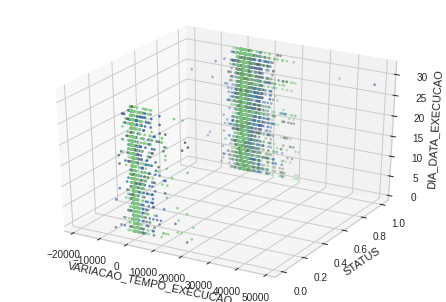

In [ ]:
fig = plt.figure()
dx = Axes3D(fig)
dx.scatter(data['VARIACAO_TEMPO_EXECUCAO'], data['STATUS'], data['DIA_DATA_EXECUCAO'], c=labels, s=5, cmap='Accent')
dx.set_xlabel('VARIACAO_TEMPO_EXECUCAO')
dx.set_ylabel('STATUS')
dx.set_zlabel('DIA_DATA_EXECUCAO')

Text(0.5, 0, 'HORA_FIM')

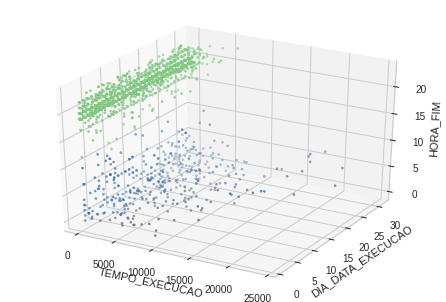

In [ ]:
X_filtered = data.loc[data["STATUS"] == 0]

fig = plt.figure()
ex = Axes3D(fig)
ex.scatter(
    X_filtered['TEMPO_EXECUCAO'],
    X_filtered['DIA_DATA_EXECUCAO'],
    X_filtered['HORA_FIM'],
    c=labels[X_filtered.index],
    s=5,
    cmap='Accent'
)
ex.set_xlabel('TEMPO_EXECUCAO')
ex.set_ylabel('DIA_DATA_EXECUCAO')
ex.set_zlabel('HORA_FIM')

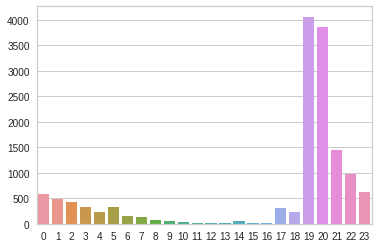

In [ ]:
data_g = data
data_g = data.groupby(["HORA_FIM"])
data_count = data_g.count()
keys = data_g.groups.keys()
fig = sns.barplot(x=list(keys), y=data_count["STATUS"].tolist())

In [ ]:
data['cluster'] = labels
data.groupby("cluster").describe()

HORA_INICIO                             ... MINUTO_FIM                  
              count       mean       std   min  ...        25%   50%   75%   max
cluster                                         ...                             
0           11656.0  19.822152  1.364070  11.0  ...       14.0  31.0  42.0  59.0
1            2406.0   2.701995  2.619401   0.0  ...       13.0  28.0  42.0  59.0
2             491.0  22.586558  0.532747  21.0  ...        9.0  22.0  38.5  59.0

[3 rows x 80 columns]

In [ ]:
X_filtered['cluster'] = labels[X_filtered.index]
X_filtered.groupby("cluster").describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


HORA_INICIO                             ... MINUTO_FIM                  
              count       mean       std   min  ...        25%   50%   75%   max
cluster                                         ...                             
0            1680.0  19.814881  1.396718  11.0  ...       14.0  31.0  42.0  59.0
1             340.0   2.697059  2.588719   0.0  ...       13.0  29.5  43.0  59.0
2              71.0  22.605634  0.492193  22.0  ...        8.0  20.0  34.5  57.0

[3 rows x 80 columns]

In [ ]:
data_g = data.groupby(["ANO_DATA_EXECUCAO", "MES_DATA_EXECUCAO", "DIA_DATA_EXECUCAO"])
descritiva = data_g.describe()
descritiva.to_excel("describe.xls")

In [ ]:
data_g = data.groupby(["ANO_DATA_EXECUCAO", "MES_DATA_EXECUCAO", "DIA_DATA_EXECUCAO", "HORA_INICIO"])
descritiva = data_g.describe()
descritiva.to_excel("describe_g.xls")

In [ ]:
data_g = data.groupby(["HORA_INICIO"])
descritiva = data_g.describe()
descritiva.to_excel("describe_horainicio.xls")

In [ ]:
data_g = data.groupby(["HORA_FIM"])
descritiva = data_g.describe()
descritiva.to_excel("describe_horafim.xls")

In [ ]:
data_copy = data

bins = [0, 6, 18, 20, 23]
labels=[1, 2, 3, 4]
data_copy['HORARIO'] = pd.cut(data_copy['HORA_INICIO'], bins=bins, labels=labels, include_lowest=True)

,AMBIENTE,JOB,HORA_INICIO,HORA_FIM,TEMPO_EXECUCAO,STATUS,VARIACAO_TEMPO_EXECUCAO,ANO_DATA_EXECUCAO,MES_DATA_EXECUCAO,DIA_DATA_EXECUCAO,MINUTO_INICIO,MINUTO_FIM,cluster,HORARIO
14,AMB6,AMB6_DCRM_RESTART_BDOC,8,8,0,1,240,2018,11,10,43,43,1,2
15,AMB6,AMB6_DCRM_RESTART_BDOC,10,10,0,1,240,2018,11,10,43,43,1,2
16,AMB7,AMB7_DCRM_RESTART_BDOC,12,12,32,0,328,2018,11,10,11,11,0,2
17,AMB6,AMB6_DCRM_RESTART_BDOC,12,12,0,1,240,2018,11,10,43,43,0,2
18,AMB8,AMB8_DCRM_RESTART_BDOC,13,14,120,1,480,2018,11,10,59,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14548,AMB9,ZC_PC_R_CO_TR_D_BLOQ,22,22,278,0,1522,2019,1,9,14,19,0,4
14549,AMB9,ZC_PC_R_CA_TR_D_DFKKKO,22,22,279,1,321,2019,1,9,16,20,0,4
14550,AMB9,ZC_PC_R_CA_TR_D_BP_ITENS,22,22,564,1,1236,2019,1,9,16,25,0,4
14551,AMB9,ZC_MC_R_NE_AT_D_DMESTRES2,22,22,590,1,910,2019,1,9,42,51,0,4


In [ ]:
data_copy2 = data_copy.groupby(['HORARIO'])
data_copy2.describe()

HORA_INICIO                                   ... cluster                    
              count       mean       std   min   25%  ...     min  25%  50%  75%  max
HORARIO                                               ...                            
1            2172.0   2.093462  1.899117   0.0   0.0  ...     1.0  1.0  1.0  1.0  1.0
2             919.0  14.552775  3.921227   7.0  11.0  ...     0.0  0.0  0.0  1.0  1.0
3            8171.0  19.475462  0.499428  19.0  19.0  ...     0.0  0.0  0.0  0.0  0.0
4            3291.0  21.751139  0.754960  21.0  21.0  ...     0.0  0.0  0.0  0.0  2.0

[4 rows x 88 columns]